# Personal YouTube History Cleaning and Analysis

This notebook is a personal deep dive into my YouTube habits using my own data from Google Takeout.
It's driven by curiosity: What do I search for most often? When do I watch YouTube the most? How have my interests changed over the years?

Objectives:
1. Clean and structure my YouTube watch and search history
2. Visualize patterns in my viewing behavior across years, days, and hours
3. Identify my most-watched channels and rewatched behavior
4. Track my engagement with Shorts vs. Regular videos
5. Understand my search habits and search trends and top queries across time

This project helps me reflect on my evolving interests, viewing routines, and how intent (searching) connects to behavior (watching). It's also a great exercise in personal data storytelling through Python.

In [22]:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [105]:
youtube = pd.read_json('/Users/crissafrancisco/Desktop/Projects/watch-history.json')
search = pd.read_json('/Users/crissafrancisco/Desktop/Projects/search-history.json')

## Data Cleaning and Visualization

### Streaming History

In [108]:
youtube.head()

,header,title,titleUrl,description,time,products,details,activityControls,subtitles
0,YouTube,Watched Cheez Whiz,https://www.youtube.com/watch?v=Na4Z8s1QgmU,Watched at 9:25 PM,2025-08-07T13:25:23.525Z,[YouTube],[{'name': 'From Google Ads'}],"[Web & App Activity, YouTube watch history, Yo...",NaN
1,YouTube,Watched McDo = GOLD!,https://www.youtube.com/watch?v=xHBWiYXqdDs,Watched at 9:13 PM,2025-08-07T13:13:01.498Z,[YouTube],[{'name': 'From Google Ads'}],"[Web & App Activity, YouTube watch history, Yo...",NaN
2,YouTube,Watched 10 PORTFOLIO PROJECTS TO ADD TO YOUR D...,https://www.youtube.com/watch?v=wObV_hwu2QM,NaN,2025-08-07T13:02:48.968Z,[YouTube],NaN,[YouTube watch history],"[{'name': 'Mo Chen', 'url': 'https://www.youtu..."
3,YouTube,Watched I asked a Google Associate Product Man...,https://www.youtube.com/watch?v=crIGOyS93uo,NaN,2025-08-07T13:00:57.387Z,[YouTube],NaN,[YouTube watch history],"[{'name': 'Michael Yitayew', 'url': 'https://w..."
4,YouTube,Watched Solb na Solb ang Kain sa Mang Inasal C...,https://www.youtube.com/watch?v=XRrvlCsvoRo,Watched at 9:00 PM,2025-08-07T13:00:50.881Z,[YouTube],[{'name': 'From Google Ads'}],"[Web & App Activity, YouTube watch history, Yo...",NaN


In [6]:
# Extract clean video title (remove 'Watched ' prefix)
youtube['video_title'] = youtube['title'].str.replace(r'^Watched ', '', regex=True).str.strip()

In [9]:
# Extract channel name from 'subtitles' column
youtube['channel_name'] = youtube['subtitles'].apply(
    lambda x: x[0]['name'] if isinstance(x, list) and isinstance(x[0], dict) and 'name' in x[0] else None
)

In [87]:
# Identify if video is an ad
youtube['is_ad'] = youtube['details'].astype(str).str.contains(
    'ad|google ads|from google|promoted|sponsored|adbreak|advert', case=False, na=False
)

In [88]:
# Add column to identify survey ads
youtube['is_survey'] = youtube['video_title'].str.contains('survey', case=False, na=False)

In [89]:
# Convert 'time' column to datetime format
youtube['watched_at'] = pd.to_datetime(youtube['time'], errors='coerce')

# Extract useful time-based features
youtube['day_of_week'] = youtube['watched_at'].dt.day_name()
youtube['hour'] = youtube['watched_at'].dt.hour
youtube['date'] = youtube['watched_at'].dt.date
youtube['year'] = youtube['watched_at'].dt.year

In [90]:
# Drop rows with missing critical values
youtube_clean = youtube.dropna(subset=['video_title', 'watched_at'])

In [91]:
# Preview cleaned dataset
youtube_clean.head()

,header,title,titleUrl,description,time,products,details,activityControls,subtitles,video_title,channel_name,watched_at,day_of_week,hour,date,is_ad,is_survey,year
0,YouTube,Watched Cheez Whiz,https://www.youtube.com/watch?v=Na4Z8s1QgmU,Watched at 9:25 PM,2025-08-07T13:25:23.525Z,[YouTube],[{'name': 'From Google Ads'}],"[Web & App Activity, YouTube watch history, Yo...",NaN,Cheez Whiz,None,2025-08-07 13:25:23.525000+00:00,Thursday,13.0,2025-08-07,True,False,2025.0
1,YouTube,Watched McDo = GOLD!,https://www.youtube.com/watch?v=xHBWiYXqdDs,Watched at 9:13 PM,2025-08-07T13:13:01.498Z,[YouTube],[{'name': 'From Google Ads'}],"[Web & App Activity, YouTube watch history, Yo...",NaN,McDo = GOLD!,None,2025-08-07 13:13:01.498000+00:00,Thursday,13.0,2025-08-07,True,False,2025.0
2,YouTube,Watched 10 PORTFOLIO PROJECTS TO ADD TO YOUR D...,https://www.youtube.com/watch?v=wObV_hwu2QM,NaN,2025-08-07T13:02:48.968Z,[YouTube],NaN,[YouTube watch history],"[{'name': 'Mo Chen', 'url': 'https://www.youtu...",10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,Mo Chen,2025-08-07 13:02:48.968000+00:00,Thursday,13.0,2025-08-07,False,False,2025.0
3,YouTube,Watched I asked a Google Associate Product Man...,https://www.youtube.com/watch?v=crIGOyS93uo,NaN,2025-08-07T13:00:57.387Z,[YouTube],NaN,[YouTube watch history],"[{'name': 'Michael Yitayew', 'url': 'https://w...",I asked a Google Associate Product Manager how...,Michael Yitayew,2025-08-07 13:00:57.387000+00:00,Thursday,13.0,2025-08-07,False,False,2025.0
4,YouTube,Watched Solb na Solb ang Kain sa Mang Inasal C...,https://www.youtube.com/watch?v=XRrvlCsvoRo,Watched at 9:00 PM,2025-08-07T13:00:50.881Z,[YouTube],[{'name': 'From Google Ads'}],"[Web & App Activity, YouTube watch history, Yo...",NaN,Solb na Solb ang Kain sa Mang Inasal Chicken I...,None,2025-08-07 13:00:50.881000+00:00,Thursday,13.0,2025-08-07,True,False,2025.0


### Search History

In [109]:
search.head()

,header,title,titleUrl,description,time,products,details,activityControls,subtitles,search_query,searched_at,year,hour,day_of_week
2,YouTube,Searched for data analyst portfolio project,https://www.youtube.com/results?search_query=d...,NaN,2025-08-07T13:02:36.461Z,[YouTube],NaN,[YouTube search history],NaN,data analyst portfolio project,2025-08-07 13:02:36.461000+00:00,2025.0,13.0,Thursday
5,YouTube,Searched for google associate product manager ...,https://www.youtube.com/results?search_query=g...,NaN,2025-08-07T13:00:38.314Z,[YouTube],NaN,[YouTube search history],NaN,google associate product manager obi okli,2025-08-07 13:00:38.314000+00:00,2025.0,13.0,Thursday
6,YouTube,Searched for google associate product manager,https://www.youtube.com/results?search_query=g...,NaN,2025-08-07T13:00:22.546Z,[YouTube],NaN,[YouTube search history],NaN,google associate product manager,2025-08-07 13:00:22.546000+00:00,2025.0,13.0,Thursday
48,YouTube,Searched for disney + tempest,https://www.youtube.com/results?search_query=d...,NaN,2025-08-03T07:29:52.556Z,[YouTube],NaN,[YouTube search history],NaN,disney + tempest,2025-08-03 07:29:52.556000+00:00,2025.0,7.0,Sunday
97,YouTube,Searched for korean englishman sat,https://www.youtube.com/results?search_query=k...,NaN,2025-08-01T11:00:27.492Z,[YouTube],NaN,[YouTube search history],NaN,korean englishman sat,2025-08-01 11:00:27.492000+00:00,2025.0,11.0,Friday


In [117]:
# Filter only 'Searched for ...' entries
search = search[search['title'].str.startswith('Searched for ', na=False)].copy()
search['search_query'] = search['title'].str.replace('Searched for ', '', regex=False)
search['searched_at'] = pd.to_datetime(search['time'], errors='coerce')
search['year'] = search['searched_at'].dt.year
search['hour'] = search['searched_at'].dt.hour
search['day_of_week'] = search['searched_at'].dt.day_name()
search['date'] = search['searched_at'].dt.date

In [118]:
# Display preview
search.head()

,header,title,titleUrl,description,time,products,details,activityControls,subtitles,search_query,searched_at,year,hour,day_of_week,date
2,YouTube,Searched for data analyst portfolio project,https://www.youtube.com/results?search_query=d...,NaN,2025-08-07T13:02:36.461Z,[YouTube],NaN,[YouTube search history],NaN,data analyst portfolio project,2025-08-07 13:02:36.461000+00:00,2025.0,13.0,Thursday,2025-08-07
5,YouTube,Searched for google associate product manager ...,https://www.youtube.com/results?search_query=g...,NaN,2025-08-07T13:00:38.314Z,[YouTube],NaN,[YouTube search history],NaN,google associate product manager obi okli,2025-08-07 13:00:38.314000+00:00,2025.0,13.0,Thursday,2025-08-07
6,YouTube,Searched for google associate product manager,https://www.youtube.com/results?search_query=g...,NaN,2025-08-07T13:00:22.546Z,[YouTube],NaN,[YouTube search history],NaN,google associate product manager,2025-08-07 13:00:22.546000+00:00,2025.0,13.0,Thursday,2025-08-07
48,YouTube,Searched for disney + tempest,https://www.youtube.com/results?search_query=d...,NaN,2025-08-03T07:29:52.556Z,[YouTube],NaN,[YouTube search history],NaN,disney + tempest,2025-08-03 07:29:52.556000+00:00,2025.0,7.0,Sunday,2025-08-03
97,YouTube,Searched for korean englishman sat,https://www.youtube.com/results?search_query=k...,NaN,2025-08-01T11:00:27.492Z,[YouTube],NaN,[YouTube search history],NaN,korean englishman sat,2025-08-01 11:00:27.492000+00:00,2025.0,11.0,Friday,2025-08-01


## Data Analysis

This only covers youtube videos that are not ads and surveys.

### Streaming History

In [92]:
# Filter out ads and surveys for analysis
youtube_filtered = youtube_clean[~youtube_clean['is_ad'] & ~youtube_clean['is_survey']]

In [93]:
youtube_filtered.head()

,header,title,titleUrl,description,time,products,details,activityControls,subtitles,video_title,channel_name,watched_at,day_of_week,hour,date,is_ad,is_survey,year
2,YouTube,Watched 10 PORTFOLIO PROJECTS TO ADD TO YOUR D...,https://www.youtube.com/watch?v=wObV_hwu2QM,NaN,2025-08-07T13:02:48.968Z,[YouTube],NaN,[YouTube watch history],"[{'name': 'Mo Chen', 'url': 'https://www.youtu...",10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,Mo Chen,2025-08-07 13:02:48.968000+00:00,Thursday,13.0,2025-08-07,False,False,2025.0
3,YouTube,Watched I asked a Google Associate Product Man...,https://www.youtube.com/watch?v=crIGOyS93uo,NaN,2025-08-07T13:00:57.387Z,[YouTube],NaN,[YouTube watch history],"[{'name': 'Michael Yitayew', 'url': 'https://w...",I asked a Google Associate Product Manager how...,Michael Yitayew,2025-08-07 13:00:57.387000+00:00,Thursday,13.0,2025-08-07,False,False,2025.0
6,YouTube,Watched 막걸리 + 전 처음 먹어본 영국 축구선수들의 반응?!,https://www.youtube.com/watch?v=DVxbaXKgUDc,NaN,2025-08-05T11:14:11.784Z,[YouTube],NaN,[YouTube watch history],"[{'name': '영국남자 Korean Englishman', 'url': 'ht...",막걸리 + 전 처음 먹어본 영국 축구선수들의 반응?!,영국남자 Korean Englishman,2025-08-05 11:14:11.784000+00:00,Tuesday,11.0,2025-08-05,False,False,2025.0
9,YouTube,Watched 치맥을 처음 먹어본 영국 축구선수들의 반응?!,https://www.youtube.com/watch?v=CKlXdPx26SY,NaN,2025-08-05T11:03:57.484Z,[YouTube],NaN,[YouTube watch history],"[{'name': '영국남자 Korean Englishman', 'url': 'ht...",치맥을 처음 먹어본 영국 축구선수들의 반응?!,영국남자 Korean Englishman,2025-08-05 11:03:57.484000+00:00,Tuesday,11.0,2025-08-05,False,False,2025.0
11,YouTube,Watched 한국 꽃등심을 처음 먹어본 영국 축구선수들의 반응?!,https://www.youtube.com/watch?v=sy9Gh-qEqAc,NaN,2025-08-05T10:51:46.067Z,[YouTube],NaN,[YouTube watch history],"[{'name': '영국남자 Korean Englishman', 'url': 'ht...",한국 꽃등심을 처음 먹어본 영국 축구선수들의 반응?!,영국남자 Korean Englishman,2025-08-05 10:51:46.067000+00:00,Tuesday,10.0,2025-08-05,False,False,2025.0


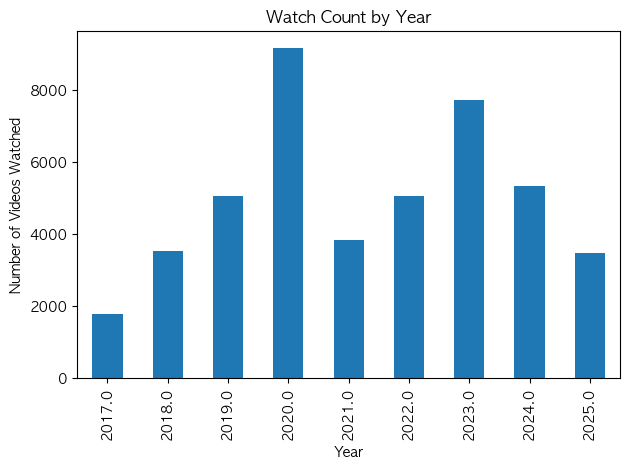

In [69]:
# Watch Trend Over Years
youtube_filtered['year'].value_counts().sort_index().plot(
    kind='bar', title='Watch Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos Watched')
plt.tight_layout()
plt.show()


Top 10 Most Watched Channels:
channel_name
KBS WORLD TV              1494
GMA Network               1144
Netflix K-Content         1044
Doobydobap                 897
영국남자 Korean Englishman     852
tvN DRAMA                  701
Kara and Nate              693
JOLLY                      606
채널십오야                      591
Matt & Abby                573
Name: count, dtype: int64


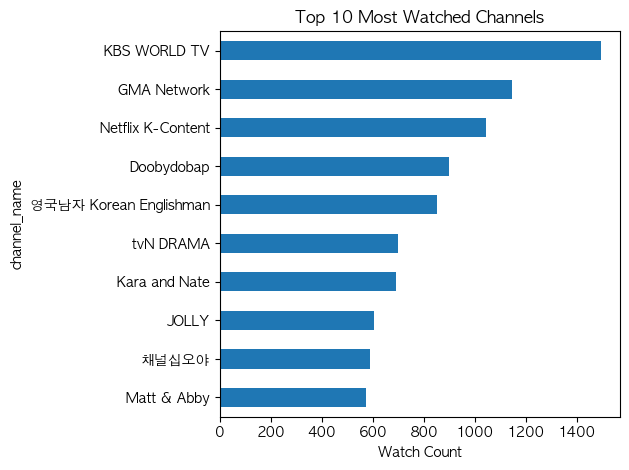

In [94]:
# Most Watched Channels
top_channels = youtube_filtered['channel_name'].value_counts().head(10)
print("\nTop 10 Most Watched Channels:")
print(top_channels)

# To Support Korean alphabet
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic' 

top_channels.plot(kind='barh', title='Top 10 Most Watched Channels')
plt.xlabel('Watch Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Most Rewatched Videos:
video_title
[골라봐야지][ENG] 팬티 안에!! (⬇️힐끔) 팬티 안에 두 글자 ㅂ0ㅂ..? 아형 찢고 간 엑소(EXO)ㅋㅋㅋ #아는형님 #JTBC봐야지                26
EXO 엑소 'Obsession' MV                                                                          17
[MV] 수지(Suzy), 백현(BAEKHYUN) - Dream                                                            17
#learningtocook                                                                                15
2 Days and 1 Night - Season 3 : Wild Flowers in Pungdo Part 1 (2014.04.27)                     14
EXO 엑소 'Love Shot' MV                                                                          12
[sub] 🧳ep.2-2 레전드탄생, 찐으로 웃다가 눈물나는 새침 경호와 발성낭비 연석의 고요속의 외침! | 🧳출장십오야 ep.2-2 ⛺슬기로운캠핑생활 ep.4-2    12
[STATION 3] D.O. 디오 '괜찮아도 괜찮아 (That's okay)' MV                                                12
[4K직캠]EXO엑소(백현)- love shot 뮤직뱅크직캠 HDR                                                          11
https://www.youtube.com/watch?v=jnUKJLiw-To                                       

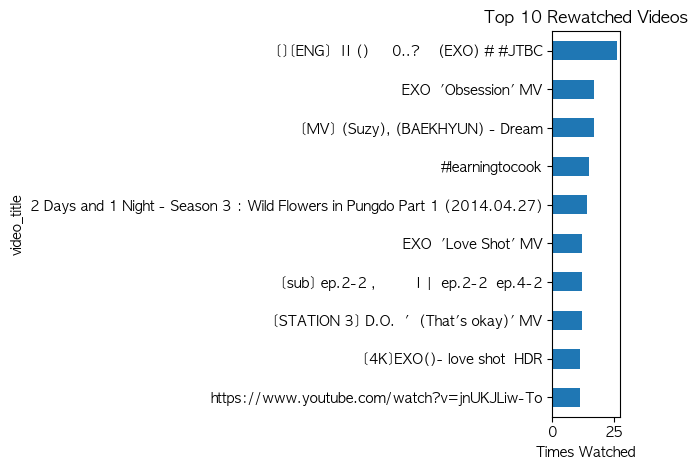

In [95]:
# Most Rewatched Videos
rewatched = youtube_filtered['video_title'].value_counts()
rewatched = rewatched[rewatched > 1].head(10)
print("\nMost Rewatched Videos:")
print(rewatched)

# Strip unsupported characters for plotting
rewatched.index = rewatched.index.str.encode('ascii', errors='ignore').str.decode('ascii')

rewatched.plot(kind='barh', title='Top 10 Rewatched Videos')
plt.xlabel('Times Watched')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

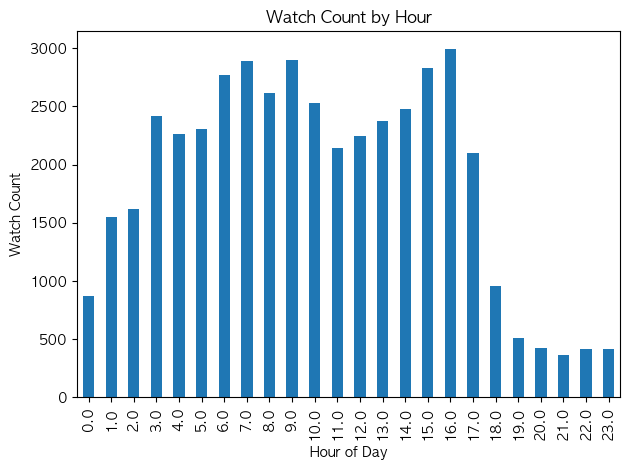

In [96]:
# Watch Patterns by Hour
youtube_filtered['hour'].value_counts().sort_index().plot(kind='bar', title='Watch Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Watch Count')
plt.tight_layout()
plt.show()

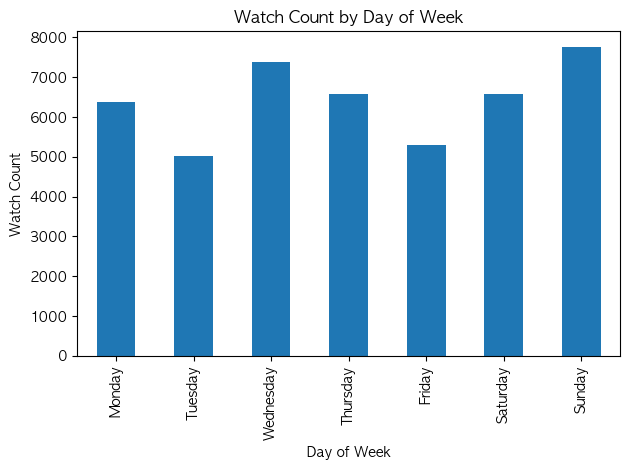

In [97]:
# Watch Patterns by Day of Week
youtube_filtered['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Watch Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Watch Count')
plt.tight_layout()
plt.show()

/var/folders/g9/dpxshsm17p942zpd830xr5pr0000gn/T/ipykernel_98260/3179707431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_filtered['is_shorts'] = youtube_filtered['video_title'].str.contains('shorts|#shorts', case=False, na=False)


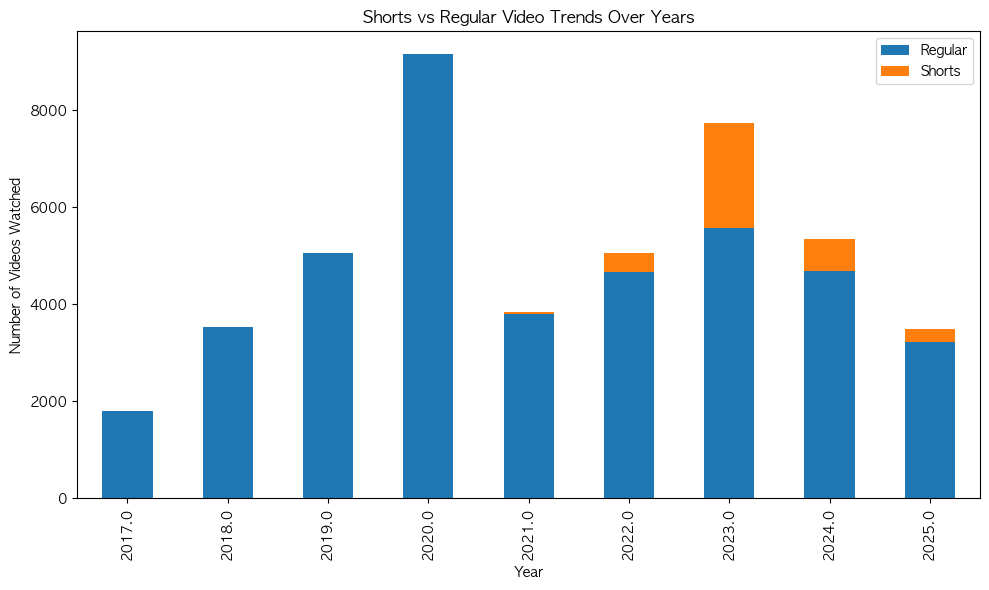

In [82]:
# Shorts vs Regular Video Trend Over Years
youtube_filtered['is_shorts'] = youtube_filtered['video_title'].str.contains('shorts|#shorts', case=False, na=False)
shorts_trend = youtube_filtered.groupby(['year', 'is_shorts']).size().unstack(fill_value=0)
shorts_trend.columns = ['Regular', 'Shorts']
shorts_trend.plot(kind='bar', stacked=True, figsize=(10,6), title='Shorts vs Regular Video Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Videos Watched')
plt.tight_layout()
plt.show()

/var/folders/g9/dpxshsm17p942zpd830xr5pr0000gn/T/ipykernel_98260/3713229912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_filtered['is_rewatch'] = youtube_filtered['video_title'].isin(rewatch_counts[rewatch_counts > 1].index)


<Axes: title={'center': 'Rewatches vs Unique Videos Over Years'}, xlabel='year'>

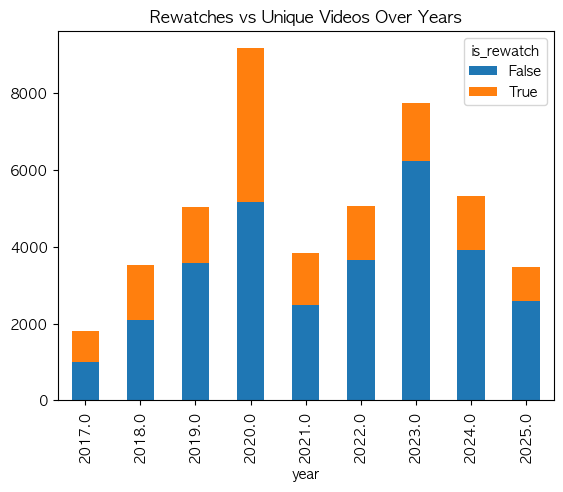

In [98]:
# Unique Videos vs Rewatches over time

rewatch_counts = youtube_filtered['video_title'].value_counts()
youtube_filtered['is_rewatch'] = youtube_filtered['video_title'].isin(rewatch_counts[rewatch_counts > 1].index)

youtube_filtered.groupby(['year', 'is_rewatch']).size().unstack().plot(kind='bar', stacked=True, title='Rewatches vs Unique Videos Over Years')

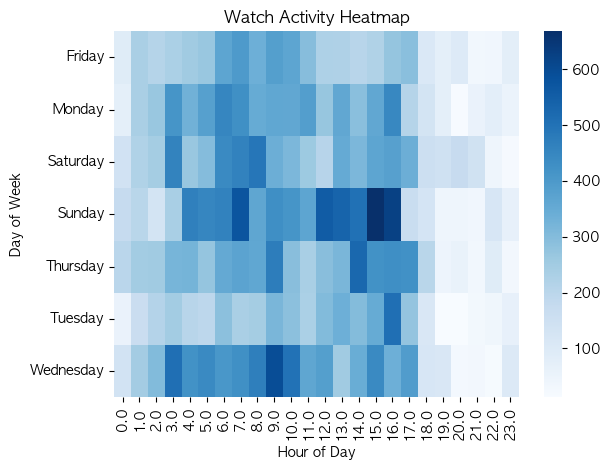

In [99]:
# Watch Time by Day + Hour Heatmap

import seaborn as sns
time_grid = youtube_filtered.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(time_grid, cmap='Blues')
plt.title('Watch Activity Heatmap')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.show()

### Watch History

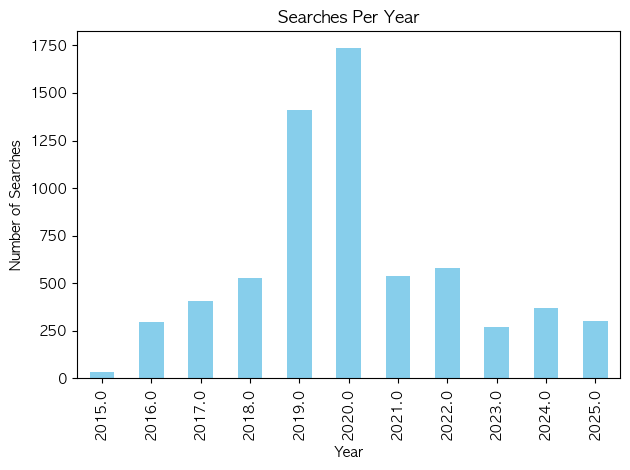

In [119]:
search['year'].value_counts().sort_index().plot(
    kind='bar', title='Searches Per Year', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

Top 10 Search Queries:
search_query
two days one night season 3    55
beautiful justice              44
my korean jagiya               38
two days one night             33
twba                           30
channel full moon              25
korean englishman              25
exo knowing brother            21
dream baekhyun suzy            20
chef and my fridge             18
Name: count, dtype: int64


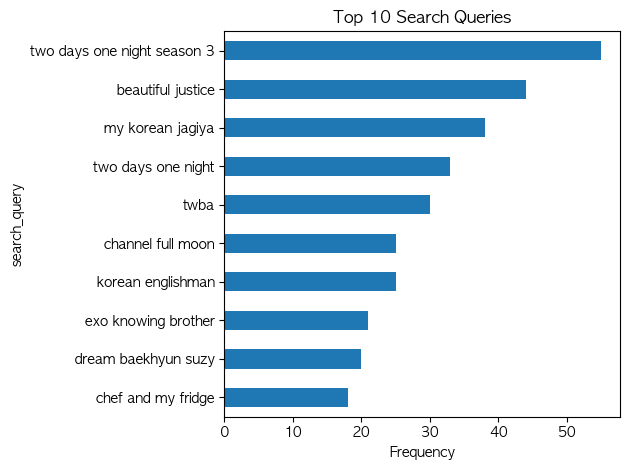

In [122]:
# Top Search Queries
top_queries = search['search_query'].value_counts().head(10)
print("Top 10 Search Queries:")
print(top_queries)

top_queries.plot(kind='barh', title='Top 10 Search Queries')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


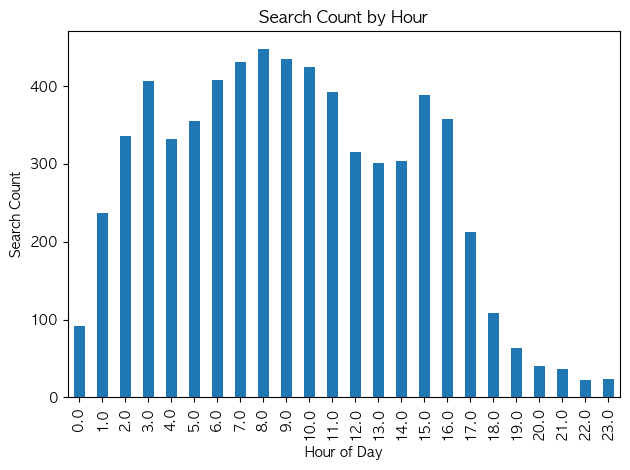

In [123]:
# Search Patterns by Hour
search['hour'].value_counts().sort_index().plot(kind='bar', title='Search Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Search Count')
plt.tight_layout()
plt.show()

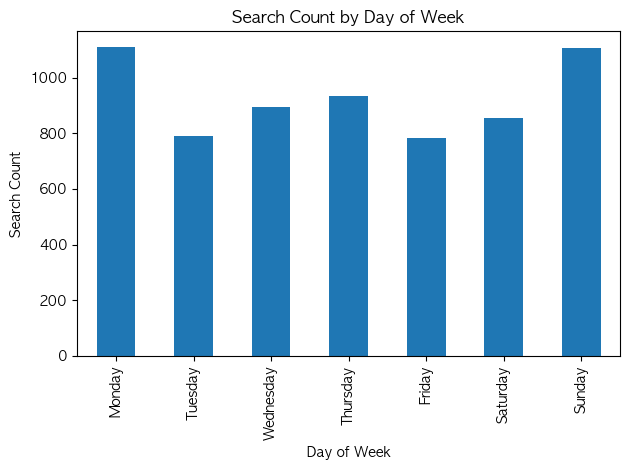

In [124]:
# Search Patterns by Day of Week
search['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Search Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Search Count')
plt.tight_layout()
plt.show()


In [128]:
from collections import Counter
import re

# Group all search queries by year
search_keywords_by_year = search.groupby('year')['search_query'].apply(lambda queries: ' '.join(queries).lower())

# Extract and count frequent words per year
keyword_trends = {}
for year, text in search_keywords_by_year.items():
    exclude_words = {'kiss', 'sexy', 'love', 'nsfw'}
    tokens = [word for word in re.findall(r'\b\w{4,}\b', text) if word not in exclude_words]
    keyword_trends[year] = Counter(tokens).most_common(10)

# Display
print("\nTop Search Keywords by Year:")
for year, keywords in keyword_trends.items():
    print(f"\n{year}:")
    for word, count in keywords:
        print(f"  {word}: {count}")




Top Search Keywords by Year:

2015.0:
  trailer: 15
  rachel: 3
  hangover: 2
  from: 2
  paris: 2
  with: 2
  friends: 2
  ross: 2
  stellar: 2
  wobble: 2

2016.0:
  trailer: 49
  jimmy: 12
  fallon: 12
  justin: 10
  timberlake: 10
  karaoke: 10
  2016: 9
  prime: 8
  minister: 8
  twba: 8

2017.0:
  night: 60
  days: 59
  trailer: 34
  korean: 32
  jagiya: 32
  twba: 18
  season: 18
  weightlifting: 18
  fairy: 18
  pretty: 15

2018.0:
  night: 125
  days: 124
  season: 73
  trailer: 55
  korean: 20
  that: 19
  with: 18
  okay: 18
  roces: 17
  scene: 16

2019.0:
  trailer: 64
  malaysia: 55
  thailand: 55
  living: 50
  asean: 40
  vietnam: 39
  beautiful: 36
  justice: 36
  alone: 34
  jane: 32

2020.0:
  baekhyun: 154
  recipe: 99
  chicken: 44
  suho: 42
  exploration: 37
  playlist: 36
  business: 35
  full: 34
  hospital: 33
  knowing: 31

2021.0:
  korean: 45
  recipe: 42
  fried: 18
  chicken: 18
  englishman: 17
  rice: 14
  hospital: 13
  playlist: 13
  fryer: 13
  trai

### Connecting Search Intent to Stream Behavior

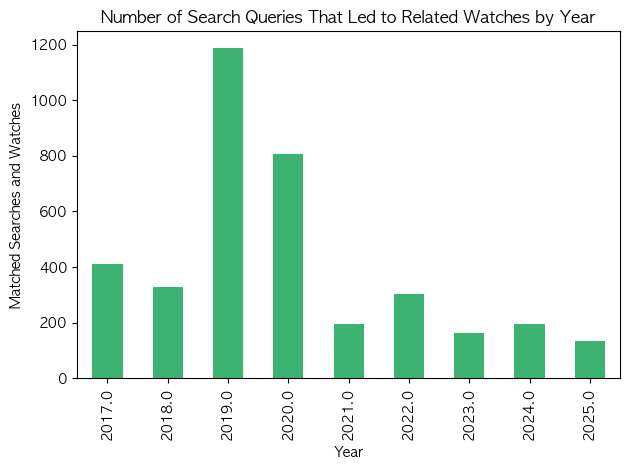

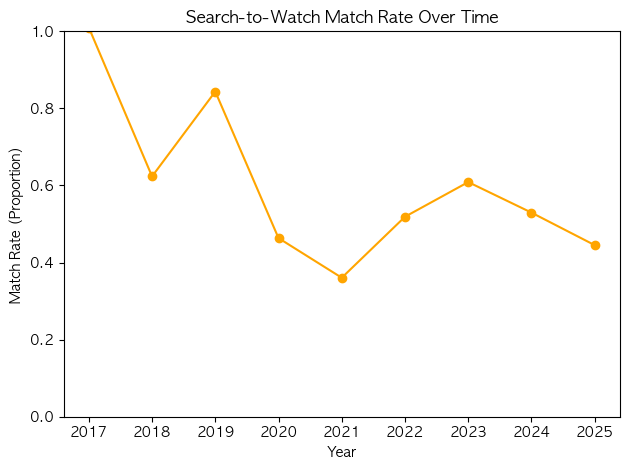

Top Search Queries That Led to the Most Matched Watches:
search_query
my korean jagiya            768
jane the virgin             127
beautiful justice            97
where on earth               86
twba                         81
My korean jagiya             73
she was pretty               57
the voice australia 2019     43
oh my ghost                  43
hospital playlist            40
Name: count, dtype: int64


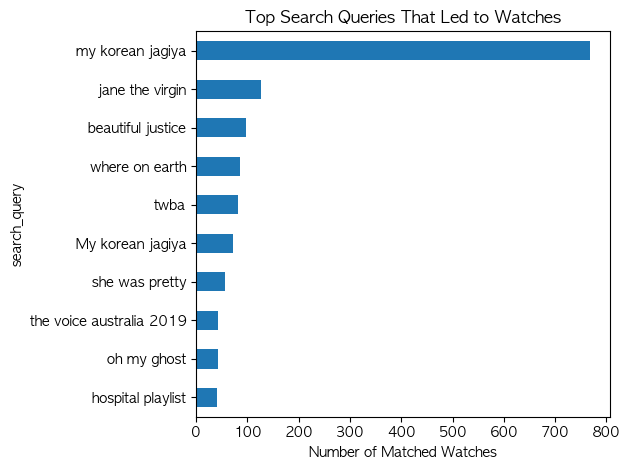

In [134]:
# Connecting Search Intent to Watch Behavior
# Did any searches result in watching videos with similar titles within the same day?
merged = pd.merge(search, youtube_filtered, how='inner', left_on='date', right_on='date', suffixes=('_search', '_watch'))
merged['search_in_title'] = merged.apply(
    lambda row: row['search_query'].lower() in row['video_title'].lower(), axis=1
)
related_views = merged[merged['search_in_title'] == True]

# Visualize intent-behavior matches by year
match_counts = related_views.groupby('year_search').size()
match_counts.plot(kind='bar', title='Number of Search Queries That Led to Related Watches by Year', color='mediumseagreen')
plt.xlabel('Year')
plt.ylabel('Matched Searches and Watches')
plt.tight_layout()
plt.show()

# Trend line of match rate over time
search_counts = search.groupby('year').size()
match_rate = match_counts / search_counts

match_rate.plot(marker='o', linestyle='-', color='orange', title='Search-to-Watch Match Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Match Rate (Proportion)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Top Search Queries That Most Often Led to Watches
match_freq = related_views['search_query'].value_counts().head(10)
print("Top Search Queries That Led to the Most Matched Watches:")
print(match_freq)

match_freq.plot(kind='barh', title='Top Search Queries That Led to Watches')
plt.xlabel('Number of Matched Watches')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Key Takeaways:

1. **Content Evolution Over Time**:
   - Earlier years (2020–2022) were dominated by series and movie content, as seen in repeated channel names and video titles.
   - In 2023 and especially 2024, there's a noticeable spike in search and watch activity around travel-related content.
   - By 2025, there's a strong shift toward programming-related searches and views, likely coinciding with starting my master's program.

2. **Consistent Interest in Cooking**:
   - Throughout the years, terms like “recipe” and “cook” consistently appear in both search history and video titles, indicating a long-term culinary interest.

3. **Shorts Consumption Rising**:
   - YouTube Shorts viewing has increased significantly since 2023, though regular videos still dominate overall time.

4. **Search-to-Watch Behavior**:
   - Many searches result in watching a related video the same day.
   - In particular, searches related to K-dramas, career preparation, and tutorials often lead to views, suggesting a strong intent-follow-through pattern.

5. **Behavioral Patterns**:
   - Watching and searching both peak during late evenings.
   - Weekdays show more consistent activity, hinting at usage as part of a daily routine.

This notebook reflects evolving personal interests and how intentional viewing (via search) translates into behavioral patterns over the years.
"""

## Key Takeaways:

1. **Content Evolution Over Time**
   - Earlier years (2020–2022) were filled with tv series, variety, and movie content — comfort viewing, likely aligned with my free time or winding down routines.
   - In 2023 and 2024, travel-related content increased significantly, reflecting my planning on trips during those years.
   - By 2025, there’s a strong shift toward programming and Python-related content, which aligned with the start of my master’s program. This shows how my academic life shaped my digital habits.

2. **Consistent Interest in Cooking**
   - Terms like “recipe” and “cook” appear every year in both my watch and search history. Cooking and food content have been a long-term theme in my YouTube activity.

3. **Most Watched Channels**
   - Many top channels were related to K-dramas, comedy (e.g., Korean Englishman, JOLLY), and lifestyle/travel — reinforcing my entertainment preferences over the years.

4. **Rewatched Videos During 2020**
   - The proportion of my rewatched content was noticeably higher in 2020. This could be due to the pandemic, I had more free time, boredom, or even the absence of my subscription to Spotify Premium (YouTube for music). It aligns with the spike in searches that year too.

5. **Search-to-Watch Behavior**
   - Many searches lead to viewing related videos, especially for shows, tutorials, or interest-driven topics. It’s satisfying to see how my search intent often results in real watch behavior.

6. **Behavioral Patterns**
   - Sundays between 2–4 PM is my most frequent watch time. That totally makes sense- weekend downtime, probably post-lunch, chilling at home.
   - Evening watch and search peaks during weekdays also suggest YouTube is part of my wind-down or study break routine.

7. **Search and Watch Trends Are Aligned**
   - There’s a clear connection between what I search and what I watch. My digital habits tell a story — from entertainment to education, from passive watching to intentional learning.

This notebook helped me understand not just my YouTube behavior, but how my interests, routines, and phases in life show up in my digital footprint. It was both insightful and fun to discover these patterns.
